In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
from IPython.display import display

In [2]:
#Splitting data into test and train

dataset=np.loadtxt('rgbvalues.txt')
labels=np.loadtxt('rgblabels.txt',dtype=np.str)

train=dataset[:900,:]
train_values=train.astype(float)/255.0
test=dataset[900:,:]
test_values=test.astype(float)/255.0
train_labels=labels[:900]
test_labels=labels[900:]


In [3]:
#One hot encoding of labels

xs=tf.constant(train_values)
labelist=["RED","GREEN","BLUE"]
lb=[]
for x in train_labels:
    lb.append(labelist.index(x))

ys1=tf.one_hot(lb,3,dtype='int32')

ys=tf.constant(ys1)


In [4]:
lb=[]
for x in test_labels:
    lb.append(labelist.index(x))
test_lb=tf.one_hot(lb,3,dtype='int32')

In [17]:
model=tf.keras.Sequential()
hidden=tf.keras.layers.Dense(12, activation='sigmoid' ,input_shape=(3,) )
output=tf.keras.layers.Dense(3, activation='softmax')
model.add(hidden)
model.add(output)


In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [19]:
history=model.fit(x=xs,y=ys,validation_split=0.2,epochs=60,shuffle=True)

Train on 720 samples, validate on 180 samples
Epoch 1/60
720/720 [==============================] - 1s 1ms/sample - loss: 1.1213 - accuracy: 0.3458 - val_loss: 1.1211 - val_accuracy: 0.3056
Epoch 2/60
720/720 [==============================] - 0s 87us/sample - loss: 1.1050 - accuracy: 0.3458 - val_loss: 1.1074 - val_accuracy: 0.3056
Epoch 3/60
720/720 [==============================] - 0s 92us/sample - loss: 1.0967 - accuracy: 0.3458 - val_loss: 1.0970 - val_accuracy: 0.3056
Epoch 4/60
720/720 [==============================] - 0s 78us/sample - loss: 1.0896 - accuracy: 0.3458 - val_loss: 1.0909 - val_accuracy: 0.3056
Epoch 5/60
720/720 [==============================] - 0s 84us/sample - loss: 1.0836 - accuracy: 0.3514 - val_loss: 1.0836 - val_accuracy: 0.3222
Epoch 6/60
720/720 [==============================] - 0s 102us/sample - loss: 1.0776 - accuracy: 0.3681 - val_loss: 1.0782 - val_accuracy: 0.3278
Epoch 7/60
720/720 [==============================] - 0s 126us/sample - loss: 1.0713

In [20]:
model.evaluate(test_values,test_lb)

100/100 [==============================] - 0s 70us/sample - loss: 0.6125 - accuracy: 0.9600


[0.6124843549728394, 0.96]

In [24]:
# function for predicting color of given image
def evalt(filename):
    image = np.empty((0,200, 200, 3)) #empty dummy array, we will append to this array all the image
    img= Image.open(filename)
    image=np.append(image, np.array(img).reshape((1,200,200, 3)), axis=0)
    x=image[:,0,0,:]/255.0
    #print(x)
    result=model.predict(x)
    r=result.argmax(1)
    print(labelist[r[0]],end="")
    display(Image.open(filename))
    #return labelist[r[0]]


GREEN

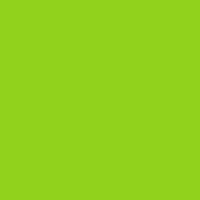

GREEN

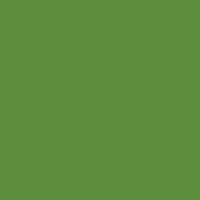

RED

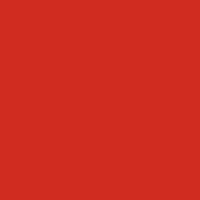

BLUE

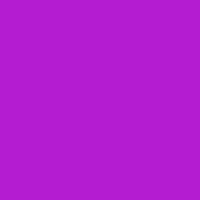

BLUE

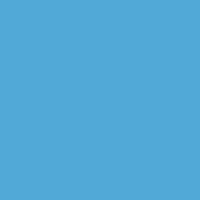

BLUE

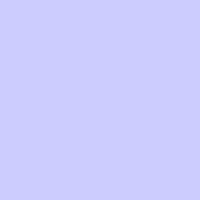

In [26]:
#predicts the color og given image
for i in range(966,971):
    evalt('data/color'+str(i)+'.jpg')
evalt('testimg.jpg')


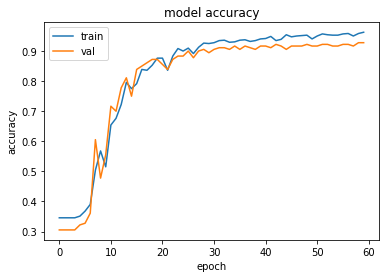

In [23]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
